# **SCIENTIFIC COMPUTING - SECOND LAB**
Author: Laura Cristina Ibarra Vasquez

# 1. Context
<p align="justify"> Agriculture is the primary source of water contamination due to the use of agrochemicals in cultivation systems. When these chemicals aren't absorbed by plants or retained in the soil, they are transported via runoff and drainage into surface and groundwater, introducing a significant quantity of pollutants that degrade water quality. To address this issue, physicochemical variables are measured to determine the overall contaminant load. However, these methods don't precisely identify the specific compound present or its concentration at low levels. Consequently, spectrometry is employed, as it captures the characteristic spectral signatures of contaminants. The integration of both physicochemical and spectral data allows for not only the measurement of the contaminant load but also the accurate identification of which specific pollutants are present in the water.

<p align="justify"> This laboratory uses the Maozhou River public dataset, which was initially implemented in Laboratory 1 and incorporates both physicochemical and spectral variables.


# 2.	Advanced data handling with Pandas.


## Dataset Description
<p align="justify"> The dataset consists of 29 water samples collected at different points along the river. Two groups of variables are available:

*<p align="justify">Physicochemical Variables:*
7 variables were evaluated:

BOD (mg/L): Biochemical Oxygen Demand

COD (mg/L): Chemical Oxygen Demand

TOC (mg/L): Total Organic Carbon

NO3 (mg/L): Nitrates

TN (mg/L): Total Nitrogen

TURB (NTU): Turbidity

EC (µS/cm): Electrical Conductivity

<p align="justify"> These variables indicate the concentration of organic matter, nutrients, and suspended solids, serving as key indicators of water contamination.

*<p align="justify"> Spectral Variables:*
Data were obtained through Ultraviolet-Visible (UV-Vis) absorption spectroscopy, recording the absorbance of the 29 surface water samples over a wavelength range of 200 to 759 nm, with a total of 1546 spectral values per sample. These data allow for the characterization of the spectral footprint of the present contaminants and complement the physicochemical information.

Both datasets are stored in Excel (.xlsx) format.

LINK BD: https://data.mendeley.com/datasets/d4vzbcxxcy/1

## Data loading

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, entropy
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier


In [ ]:
physicochemical_parameters = pd.read_excel("actual_concen_sfwater.xlsx")
physicochemical_parameters

,LocationID,BOD(mg/L),COD(mg/L),TOC(mg/L),NO3(mg/L),TN(mg/L),TURB(NTU),EC
0,1,3.1,10.5,7.795,1.254284,5.157636,7.1,412
1,2,4.9,23.5,7.955,0.386898,4.789389,19.0,361
2,3,2.5,1.5,6.005,0.252430,0.508341,13.0,313
3,4,1.1,16.0,3.270,1.705831,1.962334,4.4,640
4,5,2.2,0.5,5.660,0.211848,0.295271,2.0,209
5,6,1.9,21.0,6.485,3.013894,4.357177,16.0,662
6,7,3.9,14.5,8.085,2.240603,3.336799,14.0,596
7,8,3.4,6.5,7.080,0.519193,1.053945,7.0,224
8,9,4.5,24.5,5.820,3.381400,4.667300,19.0,758
9,10,2.3,7.5,6.550,0.279186,0.509743,14.0,197


<p align="justify"> This database contains the physicochemical data of water. The "LocationID" column represents a water sample taken at a specific point in the river, while the other columns contain the measured concentrations of the physicochemical variables.

**Display of data types:**

<p align="justify"> The type function is used to verify that the loaded data corresponds to a DataFrame, while dtypes is used to identify the data types of each column within the table.

In [ ]:
print(type(physicochemical_parameters))
print(physicochemical_parameters.dtypes)
print(physicochemical_parameters.shape)

<class 'pandas.core.frame.DataFrame'>
LocationID      int64
BOD(mg/L)     float64
COD(mg/L)     float64
TOC(mg/L)     float64
NO3(mg/L)     float64
TN(mg/L)      float64
TURB(NTU)     float64
EC              int64
dtype: object
(29, 8)


**Spectral data**

In [ ]:
specdata = pd.read_excel("specdata_undeno_sfwater.xlsx")
specdata

,wavelength,200.383431,200.780837,201.178206,201.575536,201.972828,202.370081,202.767296,203.164473,203.561611,...,756.822699,757.144023,757.465285,757.786488,758.107629,758.428709,758.749729,759.070688,759.391586,759.712423
0,1,0.199832,0.183891,0.198323,0.206870,0.229146,0.283294,0.292654,0.277861,0.277076,...,0.022909,0.021651,0.020437,0.020293,0.020523,0.019962,0.015444,0.014609,0.015178,0.015068
1,2,0.090097,0.096615,0.110360,0.124857,0.127730,0.139812,0.141664,0.168379,0.176664,...,0.036647,0.036104,0.037008,0.038794,0.037900,0.038900,0.034007,0.032499,0.031442,0.030039
2,3,0.105817,0.089095,0.089808,0.105924,0.099336,0.138957,0.160036,0.155239,0.169237,...,0.028355,0.027858,0.028144,0.029326,0.030662,0.029840,0.024942,0.022485,0.025046,0.024534
3,4,0.075513,0.057059,0.054882,0.079926,0.100160,0.126784,0.146868,0.155772,0.185310,...,0.010223,0.008892,0.008068,0.010489,0.009901,0.007527,0.004234,0.001687,0.001928,0.000539
4,5,-0.026597,-0.032588,-0.038012,-0.027036,-0.030480,-0.006004,0.024028,0.012234,0.023033,...,0.006029,0.002716,0.000095,0.000031,0.000861,0.000881,-0.003535,-0.006462,-0.003559,-0.001322
5,6,0.013206,0.001168,0.008117,0.034850,0.043405,0.072344,0.091070,0.094662,0.126202,...,0.024887,0.023377,0.021267,0.022846,0.021142,0.021660,0.019023,0.019051,0.021206,0.025019
6,7,0.108530,0.117218,0.129051,0.166042,0.154651,0.147373,0.142509,0.146709,0.171365,...,0.019960,0.019735,0.017163,0.018998,0.019688,0.021980,0.019208,0.016782,0.018062,0.019732
7,8,0.008377,0.007078,-0.012354,0.000669,0.012999,0.039873,0.064722,0.087449,0.099189,...,0.003098,0.002495,0.003447,0.004786,0.002621,0.000448,-0.003776,-0.007621,-0.008593,-0.008383
8,9,0.020090,0.011596,0.022575,0.058468,0.036384,0.072836,0.103863,0.101046,0.130034,...,0.024904,0.024326,0.022801,0.020959,0.018671,0.017269,0.015865,0.013156,0.015196,0.015408
9,10,0.029359,0.025482,0.040632,0.044634,0.044617,0.088883,0.092281,0.108733,0.117479,...,0.009169,0.008297,0.007100,0.008315,0.008257,0.008032,0.005151,0.003696,0.003488,0.005493


<p align="justify"> The database contains spectral records of water samples. The "wavelength" header corresponds to wavelengths between 200 and 759 nm. The first column identifies the sample number, and the subsequent columns contain the measured absorbance values at each specific wavelength, which together form the spectral signature for each sample.

**Display of data types:**

In [ ]:
print(type(specdata))
print(specdata.dtypes)
print(specdata.shape)

<class 'pandas.core.frame.DataFrame'>
wavelength      int64
200.383431    float64
200.780837    float64
201.178206    float64
201.575536    float64
               ...   
758.428709    float64
758.749729    float64
759.070688    float64
759.391586    float64
759.712423    float64
Length: 1547, dtype: object
(29, 1547)


**Database Unification for Visualization**

<p align="justify"> The two dataframes are joined, this is to ensure that each sample contains both its physicochemical values and its spectrum.





In [ ]:
physicochemicalAndspecdata = pd.merge(physicochemical_parameters,
                            specdata.rename(columns={"wavelength":"LocationID"}),
                            on="LocationID", how="inner", validate="one_to_one")
physicochemicalAndspecdata

,LocationID,BOD(mg/L),COD(mg/L),TOC(mg/L),NO3(mg/L),TN(mg/L),TURB(NTU),EC,200.383431,200.780837,...,756.822699,757.144023,757.465285,757.786488,758.107629,758.428709,758.749729,759.070688,759.391586,759.712423
0,1,3.1,10.5,7.795,1.254284,5.157636,7.1,412,0.199832,0.183891,...,0.022909,0.021651,0.020437,0.020293,0.020523,0.019962,0.015444,0.014609,0.015178,0.015068
1,2,4.9,23.5,7.955,0.386898,4.789389,19.0,361,0.090097,0.096615,...,0.036647,0.036104,0.037008,0.038794,0.037900,0.038900,0.034007,0.032499,0.031442,0.030039
2,3,2.5,1.5,6.005,0.252430,0.508341,13.0,313,0.105817,0.089095,...,0.028355,0.027858,0.028144,0.029326,0.030662,0.029840,0.024942,0.022485,0.025046,0.024534
3,4,1.1,16.0,3.270,1.705831,1.962334,4.4,640,0.075513,0.057059,...,0.010223,0.008892,0.008068,0.010489,0.009901,0.007527,0.004234,0.001687,0.001928,0.000539
4,5,2.2,0.5,5.660,0.211848,0.295271,2.0,209,-0.026597,-0.032588,...,0.006029,0.002716,0.000095,0.000031,0.000861,0.000881,-0.003535,-0.006462,-0.003559,-0.001322
5,6,1.9,21.0,6.485,3.013894,4.357177,16.0,662,0.013206,0.001168,...,0.024887,0.023377,0.021267,0.022846,0.021142,0.021660,0.019023,0.019051,0.021206,0.025019
6,7,3.9,14.5,8.085,2.240603,3.336799,14.0,596,0.108530,0.117218,...,0.019960,0.019735,0.017163,0.018998,0.019688,0.021980,0.019208,0.016782,0.018062,0.019732
7,8,3.4,6.5,7.080,0.519193,1.053945,7.0,224,0.008377,0.007078,...,0.003098,0.002495,0.003447,0.004786,0.002621,0.000448,-0.003776,-0.007621,-0.008593,-0.008383
8,9,4.5,24.5,5.820,3.381400,4.667300,19.0,758,0.020090,0.011596,...,0.024904,0.024326,0.022801,0.020959,0.018671,0.017269,0.015865,0.013156,0.015196,0.015408
9,10,2.3,7.5,6.550,0.279186,0.509743,14.0,197,0.029359,0.025482,...,0.009169,0.008297,0.007100,0.008315,0.008257,0.008032,0.005151,0.003696,0.003488,0.005493


<p align="justify"> The Pandas merge function was employed to perform the unification, using the physicochemical and spectral dataframes as parameters. The rename function was first applied to the spectral dataframe to change the "wavelength" column to "LocationID," matching the unique sample identifier in the physicochemical data. An inner join was executed using on="LocationID" and how="inner", ensuring that only rows with identical LocationIDs present in both tables were retained, excluding any missing IDs. Crucially, validate="one_to_one" was included to confirm that each LocationID appeared exactly once per table, halting the process if duplicates were detected, thereby preventing data multiplication or corruption.

The database was unified to consolidate all information pertaining to each water sample into a single row, thereby clarifying the complete set of characteristics available for subsequent processes.

**Review of Replicate Water Samples**
<p align="justify"> The is_unique function was used to verify the absence of duplicate entries within the LocationID column. A return value of True confirms that each sample appears only once, indicating the successful and correct execution of the merging operation.

In [ ]:
physicochemicalAndspecdata["LocationID"].is_unique

True

**Display of data types:**


In [ ]:
print(type(physicochemicalAndspecdata))
print(physicochemicalAndspecdata.dtypes)
print(physicochemicalAndspecdata.shape)

<class 'pandas.core.frame.DataFrame'>
LocationID      int64
BOD(mg/L)     float64
COD(mg/L)     float64
TOC(mg/L)     float64
NO3(mg/L)     float64
               ...   
758.428709    float64
758.749729    float64
759.070688    float64
759.391586    float64
759.712423    float64
Length: 1554, dtype: object
(29, 1554)


<p align="justify">The resulting unified dataset comprises 29 samples and 1554 total columns. Excluding the LocationID identifier, the dataset features 1553 characteristics, consisting of 7 physicochemical variables and 1546 spectral features, all of which are of the floating-point data type.

**Review missing data**
<p align="justify"> Despite the dataset containing only 29 samples, it encompasses 1554 columns, necessitating a verification for missing values. To accomplish this, the isna() function was employed to identify missing entries, followed by the sum() function to calculate the total count of missing values per column. Subsequently, the sums across all columns were aggregated to determine the overall total of missing data points within the unified dataframe.

In [ ]:
emptycol = physicochemicalAndspecdata.isna().sum()
print(f"Missing values per column:\n{emptycol}")
totalempty = emptycol.sum()
print(f"Total missing values:{totalempty}")

Missing values per column:
LocationID    0
BOD(mg/L)     0
COD(mg/L)     0
TOC(mg/L)     0
NO3(mg/L)     0
             ..
758.428709    0
758.749729    0
759.070688    0
759.391586    0
759.712423    0
Length: 1554, dtype: int64
Total missing values:0


<p align="justify">Both the count per column and the aggregated total yielded zero, confirming the absence of any missing data points in the dataset. This operation, which verified the presence of missing data (null values), was executed to determine the necessity of data imputation (gap filling). Given the limited number of available samples, ensuring that each sample possessed complete data was crucial for subsequent analyses. In this specific case, as the count of missing values was zero, the process of data imputation was deemed unnecessary.

**Verify that the merged dataframe is sorted**
<p align="justify">To verify the appropriate column order subsequent to the merge operation, the columns were segmented based on their name type using "isinstance". A list designated as columnString was created for columns with a textual name, and another list, columnFloat, was generated for columns with a numerical name. This distinction facilitated the identification of which block corresponds to physicochemical variables and which corresponds to spectral variables. Subsequently, the built-in sorted function was utilized to generate a sorted version of each list, which was then compared against its respective original list; coincidence between the two versions indicated that the respective segment was ordered.

In [ ]:
columnstring = [c for c in physicochemicalAndspecdata.columns if isinstance(c, str)]
columnfloat = [c for c in physicochemicalAndspecdata.columns if isinstance(c, float)]
print("Columns where the variable name is a string:", columnstring)
print("Columns where the variable name is a float:", columnfloat)
print(columnstring == sorted(columnstring))
print(columnfloat == sorted(sorted(columnfloat)))

Columns where the variable name is a string: ['LocationID', 'BOD(mg/L)', 'COD(mg/L)', 'TOC(mg/L)', 'NO3(mg/L)', 'TN(mg/L)', 'TURB(NTU)', 'EC']
Columns where the variable name is a float: [200.383430568598, 200.780837306739, 201.178205735456, 201.575535840127, 201.972827606127, 202.370081018831, 202.767296063617, 203.164472725861, 203.561610990937, 203.958710844224, 204.355772271096, 204.752795256931, 205.149779787103, 205.54672584699, 205.943633421967, 206.340502497411, 206.737333058698, 207.134125091203, 207.530878580303, 207.927593511375, 208.324269869794, 208.720907640936, 209.117506810178, 209.514067362896, 209.910589284465, 210.307072560263, 210.703517175664, 211.099923116046, 211.496290366785, 211.892618913256, 212.288908740836, 212.685159834901, 213.081372180826, 213.47754576399, 213.873680569766, 214.269776583532, 214.665833790663, 215.061852176537, 215.457831726528, 215.853772426013, 216.249674260369, 216.64553721497, 217.041361275195, 217.437146426418, 217.832892654016, 218.2

<p align="justify"> The analysis confirmed that the physicochemical columns possess string (textual) names, whereas the spectral columns have numerical names. Crucially, the spectral block was confirmed to be correctly ordered (i.e., sorted), which is essential because the wavelengths must be in ascending order to enable accurate filtering by ranges, summarization by bands, and error-free plotting. The string-named block, conversely, yielded a 'False' result upon comparison with its sorted version. However, reordering this block is not necessary, as these columns are utilized by their specific name (e.g., BOD, COD, etc.), rather than by their positional index. Consequently, their internal order does not affect the data content or subsequent calculations.

**Plot of spectral data**

<Axes: title={'center': 'Comparison of spectral signatures'}, xlabel='Wavelength (nm)', ylabel='Absorbance'>

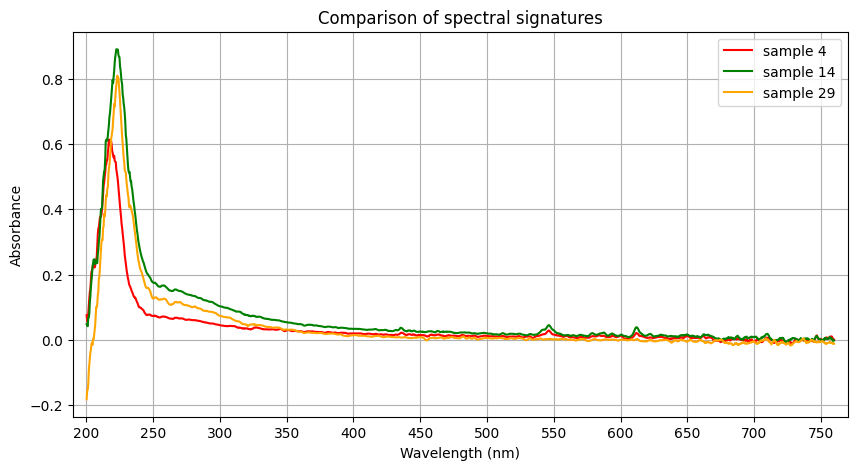

In [ ]:
samples = [4, 14, 29]
sampleplot = (physicochemicalAndspecdata.set_index("LocationID").loc[samples, columnfloat].T.reset_index())

sampleplot.columns = ["wavelength", "sample 4", "sample 14", "sample 29"]

sampleplot.plot(x="wavelength", y=["sample 4","sample 14","sample 29"], figsize=(10,5), color=["red","green","orange"], linewidth=1.5, grid=True,
                 title="Comparison of spectral signatures", xlabel="Wavelength (nm)", ylabel="Absorbance",
                 xticks=list(range(200,761,50)), xlim=(190,770))

<p align="justify"> A plot was generated for three representative samples from the database to visualize the characteristics of the spectral data. As observed, the resulting graph exhibits a prominent peak, which corresponds to the region of maximum absorption, likely indicating the highest concentration of contaminants. Furthermore, there are sections that display extremely low absorption, which may be attributable to noise introduced by the instrumentation employed. Consequently, further processing operations must be conducted to determine whether these specific spectral ranges are essential for the analysis or if they can be  omitted





**Verify the spectral signature for inherent noise**
<p align="justify"> The standard deviation was calculated for each individual wavelength, and these values were subsequently compared between the spectral edges and the central region of the spectrum. This procedure is utilized to quantify the noise inherent in the spectral data and inform the decision of whether the spectral extremes should be retained or trimmed prior to further processing.

<p align="justify">The "columnDeviation" variable stores the standard deviation computed per wavelength, derived from the spectral columns "columnFloat". The waves variable holds the 300 selected wavelengths designated as the spectral edges. This selection was based on the highest peak and greatest variation at the start of the graph, and the lowest absorbance at the end. "compareWaves" concatenates the first 300 and the last 300 wavelengths. "centerWaves" contains the central wavelengths. The "ratio" operation computes the median to compare the variability of the edges with that of the center.

In [ ]:
columndeviation = physicochemicalAndspecdata[columnfloat].std(axis=0)
waves = 300

comparewaves = pd.concat([columndeviation.head(waves), columndeviation.tail(waves)])
centerwaves = columndeviation.iloc[waves:-waves]

ratio = comparewaves.median()/centerwaves.median()
print(f"The ratio between edge and center deviation is {ratio}")

The ratio between edge and center deviation is 1.4465753897049474


<p align="justify"> An empirical threshold for the comparison ratio was established at $>2$ to identify spectral regions exhibiting significantly higher variability than the rest of the spectrum. This criterion aligns with recommended practices in spectral preprocessing studies (e.g., Rinnan et al., 2009; Yan, 2025). Since the resulting ratio was found to be $<2$, it signifies that the spectrum is sufficiently stable; consequently, the noise level is not substantial enough to warrant the removal of wavelengths.

**Standard Normal Variate (SNV)**
<p align="justify"> The Standard Normal Variate (SNV) normalization method was applied to the spectral data to mitigate differences primarily caused by light intensity, sample concentration, or instrument-related variations. This technique transforms each spectrum by subtracting its mean and dividing the result by its standard deviation, which centers the values around zero and scales them to a common variance. Consequently, all spectra can be compared based on their spectral shape rather than their absolute magnitude. This prevents a sample with seemingly higher intensity from appearing more contaminated than another when the difference is merely due to variations in light measurement or scattering effects

<p align="justify"> During this process, the mean and standard deviation for each row were calculated using the pandas functions mean(axis=1) and std(axis=1), respectively. These functions ensure that these values consider all wavelengths within each individual sample (row). Subsequently, normalization was applied by subtracting the mean of each row using sub() and dividing by its standard deviation using div(), an operation that centers each spectrum at zero and scales it to a common magnitude. To preclude potential division errors, the replace(0,1) function was utilized to ensure that no division by zero occurred. Finally, a copy of the original dataset was created to preserve the normalized data. The global mean and standard deviation, in addition to the minimum and maximum values, were then printed to observe the final range achieved post-normalization

In [ ]:
rowmean = physicochemicalAndspecdata[columnfloat].mean(axis=1)
rowdeviation = physicochemicalAndspecdata[columnfloat].std(axis=1)
normalizspec = (physicochemicalAndspecdata[columnfloat].sub(rowmean, axis=0).div(rowdeviation.replace(0,1), axis=0))

spectra_data_nor = physicochemicalAndspecdata.copy()
spectra_data_nor[columnfloat] = normalizspec

print("Average:", spectra_data_nor[columnfloat].mean(axis=1).mean())
print("Average deviation:", spectra_data_nor[columnfloat].std(axis=1).mean())
print("SNV minimum and maximum values:", spectra_data_nor[columnfloat].min().min(),spectra_data_nor[columnfloat].max().max())

Average: 1.0925546450902043e-16
Average deviation: 1.0000000000000002
SNV minimum and maximum values: -1.9262898228275527 6.763468794197272


<p align="justify"> The obtained results confirm that the normalization via the Standard Normal Variate (SNV) method was applied correctly. The average mean across the transformed spectra is close to zero, which indicates that each individual spectrum was centered with respect to its own average absorbance, thereby eliminating differences primarily attributable to overall sample intensity or concentration. Furthermore, the average standard deviation is approximately one, demonstrating that the variability of each spectrum has been adjusted to a common scale.

<p align="justify"> The minimum and maximum values were printed to observe the range achieved post-normalization. These values demonstrate that the overall scale remains coherent, despite the presence of extreme outliers. The highest values represent absorption peaks that are more intense relative to the rest of the spectrum, which is considered normal behavior subsequent to the application of the SNV method.

**Plot of spectral data normalized**

<Axes: title={'center': 'SNV-normalized spectral signatures'}, xlabel='Wavelength (nm)', ylabel='SNV absorbance'>

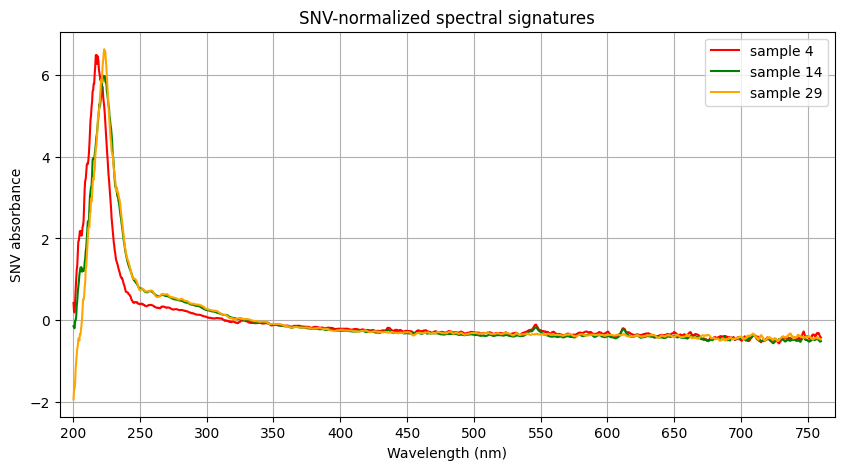

In [ ]:
samples = [4, 14, 29]

sampleplot_snv = (spectra_data_nor.set_index("LocationID").loc[samples, columnfloat].T.reset_index())
sampleplot_snv.columns = ["wavelength", "sample 4", "sample 14", "sample 29"]

sampleplot_snv.plot(x="wavelength",y=["sample 4", "sample 14", "sample 29"],figsize=(10, 5),
                    color=["red", "green", "orange"],linewidth=1.5,grid=True,title="SNV-normalized spectral signatures",
                    xlabel="Wavelength (nm)",ylabel="SNV absorbance",xticks=list(range(200, 761, 50)),xlim=(190, 770))

<p align="justify"> The normalized plot demonstrates that the three spectral signatures are now centered around zero, effectively eliminating inter-sample intensity differences. Unlike the original graph, where each curve exhibited a distinct magnitude (height), the result of the SNV process preserves the core shape of the spectrum while adjusting the scale. This allows for the comparison of actual absorption variations without the confounding influence of sample concentration or instrumental effects.

**Principal Component Analysis (PCA)**

<p align="justify"> Principal Component Analysis (PCA) was employed to reduce the high dimensionality of the spectral data, specifically transitioning from 1546 wavelengths to a smaller set of variables that collectively retain the majority of the information. Given the spectrometer's resolution of 0.36, this procedure allows for the elimination of redundancies and simplification of the subsequent analysis. By preserving approximately 95% of the total data variance, the transformation ensures that the principal differences among the samples remain accurately represented.

<p align="justify"> The function isinstance(c, float) was utilized to identify the spectral columns that had already undergone normalization. Subsequently, a new matrix containing solely these spectral columns was created as spec_matriz = spectra_data_nor[spec_cols]. Following this, the fit() function from the PCA class was employed to adjust the Principal Component Analysis model to the data, thereby seeking the linear combinations that account for the maximum possible variance. The cumulative sum of the variance explained by each component was then computed using np.cumsum(pca.explained_variance_ratio_) to quantify the information contribution of each component.The accumulated variance values were subsequently transformed into a pandas Series using pd.Series(var_exp) and plotted using the plot() method. Finally, the plt.axhline() function was used to plot a horizontal line at the 95% explained variance threshold, serving as a visual reference for determining the optimal number of Principal Components to retain


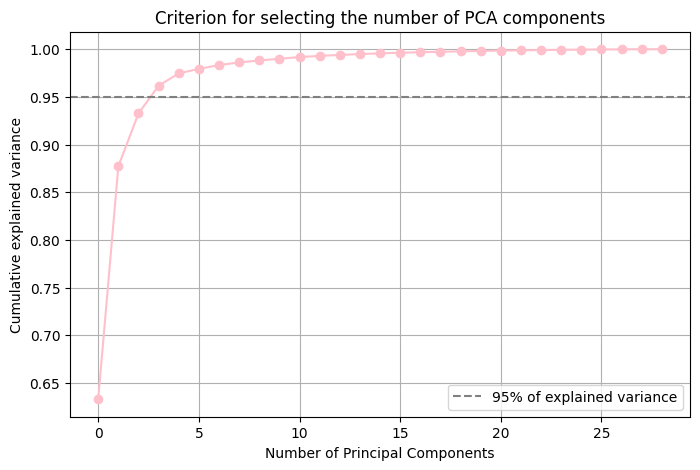

In [ ]:
spec_cols = [c for c in spectra_data_nor.columns if isinstance(c, float)]
spec_matriz = spectra_data_nor[spec_cols]

pca = PCA().fit(spec_matriz)
var_exp = np.cumsum(pca.explained_variance_ratio_)

pd.Series(var_exp).plot(kind="line", marker="o", color="pink", figsize=(8,5),
                        title="Criterion for selecting the number of PCA components",
                        grid=True, ylabel="Cumulative explained variance", xlabel="Number of Principal Components")

plt.axhline(y=0.95, color="gray", linestyle="--", label="95% of explained variance")
plt.legend()
plt.show()

<p align="justify"> A total of five components were selected because the cumulative variance plot surpasses the 95% threshold near the third or fourth component, and by the fifth component, it already accounts for approximately 98% of the total variability. Beyond this point, the curve flattens significantly, with each subsequent component contributing less than 1% of additional variance. Retaining five components thus achieves a substantial reduction in dimensionality with minimal information loss.

<p align="justify"> The PCA(n_components=5) function was utilized to specify the five Principal Components that collectively represent over 95% of the total variance, as determined by the cumulative variance plot. Subsequently, the fit_transform(spec_matriz) method was applied to fit the model to the spectral data and transform the original variables into the new components. The result was stored in a DataFrame using pd.DataFrame(pca_result, columns=[f"PCA_{i+1}" for i in range(5)]), where a distinct name was assigned to each component.Subsequently, pd.concat() was employed to combine the generated PCA components with the original normalized DataFrame (spectra_data_nor), unifying both structures row-wise.The instruction pca_final.explained_variance_ratio_.cumsum()[-1] was executed to verify that the five components successfully retain the majority of the information from the original dataset.Finally, cols_to_keep was used to filter the non-spectral columns and merge them with the new PCA components, generating the final DataFrame, spectra_final. This resulting DataFrame encompasses both the physicochemical data and the reduced spectral variables

In [ ]:
pca_final = PCA(n_components=5)
pca_result = pca_final.fit_transform(spec_matriz)

pca_df = pd.DataFrame(pca_result, columns=[f"PCA_{i+1}" for i in range(5)])
spectra_data_pca = pd.concat([spectra_data_nor.reset_index(drop=True), pca_df], axis=1)

print("Total cumulative variance:", pca_final.explained_variance_ratio_.cumsum()[-1])

cols_to_keep = [c for c in spectra_data_nor.columns if not isinstance(c, float) and c != "LocationID"]
spectra_final = pd.concat([spectra_data_nor[["LocationID"] + cols_to_keep].reset_index(drop=True),pca_df.drop(columns=["LocationID"], errors="ignore")], axis=1)
spectra_final.head()

Total cumulative variance: 0.9746505640604458


,LocationID,BOD(mg/L),COD(mg/L),TOC(mg/L),NO3(mg/L),TN(mg/L),TURB(NTU),EC,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,1,3.1,10.5,7.795,1.254284,5.157636,7.1,412,-1.348793,11.037226,2.965924,1.412316,-0.402386
1,2,4.9,23.5,7.955,0.386898,4.789389,19.0,361,-14.399892,0.316740,-1.154608,1.602039,-0.742600
2,3,2.5,1.5,6.005,0.252430,0.508341,13.0,313,-14.482431,4.435474,0.807501,1.724528,-1.278900
3,4,1.1,16.0,3.270,1.705831,1.962334,4.4,640,5.018504,13.442688,-0.541874,0.500286,-0.272264
4,5,2.2,0.5,5.660,0.211848,0.295271,2.0,209,-8.630497,3.736476,0.079687,-6.679877,-0.853681


<p align="justify"> With five Principal Components, 97.47% of the total variability is explained; therefore, this dimensionality reduction transformation is considered sufficient.

**Replacement of negative values in physicochemical data**
<p align="justify"> Negative values were eliminated due to the nature of the physicochemical variables, which should not inherently possess negative measurements. The presence of such values indicates a potential sensor malfunction during data acquisition. Consequently, these erroneous measurements were replaced with zero.

<p align="justify"> A copy of the physicochemical variable subset from the dataset, specified as physicochemicalAndspecdata[columnstring], was created and stored in the DataFrame phys_data.Subsequently, the .clip(lower=0) method was applied to this DataFrame to replace all negative values with 0, thereby ensuring the physical validity of the concentration measurements.Finally, logical comparisons (< 0 and == 0) combined with the .sum() method were utilized to count the number of negative or zero values present in each variable, and these counts were outputted using print().

In [ ]:
phys_data = physicochemicalAndspecdata[columnstring].drop(columns=["LocationID"], errors="ignore").copy()
phys_data = phys_data.clip(lower=0)
print("Checking for negative values in phys_data:")
print((phys_data < 0).sum())
print("\nChecking for zero values in phys_data:")
print((phys_data == 0).sum())

Checking for negative values in phys_data:
BOD(mg/L)    0
COD(mg/L)    0
TOC(mg/L)    0
NO3(mg/L)    0
TN(mg/L)     0
TURB(NTU)    0
EC           0
dtype: int64

Checking for zero values in phys_data:
BOD(mg/L)    0
COD(mg/L)    0
TOC(mg/L)    0
NO3(mg/L)    0
TN(mg/L)     0
TURB(NTU)    0
EC           0
dtype: int64


<p align="justify"> The results indicate 0 negative values and 0 values across all variables. This confirms that the data cleaning process was successful and the data are now prepared for the subsequent processing step.


**Outlier removal**
<p align="justify"> Due to the susceptibility of environmental measurements to extreme high or low values potentially resulting from equipment errors, unusual environmental conditions, or sample collection issues—the Interquartile Range (IQR) method was employed to mitigate these outlying values. This procedure ensures that the data are contained within a more logical range, making them more representative of the actual conditions. Consequently, this prevents a few aberrant values from unduly affecting the overall analysis of water quality.

<p align="justify"> The quartiles were calculated using quantile(0.25) and quantile(0.75) to obtain Q1 and Q3, respectively, and the Interquartile Range was determined as IQR = Q3 - Q1.Subsequently, the .clip(lower=Q1 - 1.5*IQR, upper=Q3 + 1.5*IQR) function was utilized to adjust the values outside the normal range, which is defined by Tukey's rule. This rule captures the range where the vast majority of true data points reside, as values outside this interval typically represent measurement error or non-representative extreme events. This clipping process effectively prevents the outliers from unduly influencing the subsequent analysis.Finally, the count of modified values was obtained using the operation ((phys_data == (Q1 - 1.5*IQR)) | (phys_data == (Q3 + 1.5*IQR))).sum()

In [ ]:
Q1 = phys_data.quantile(0.25)
Q3 = phys_data.quantile(0.75)
IQR = Q3 - Q1

phys_data = phys_data.clip(lower=Q1 - 1.5*IQR, upper=Q3 + 1.5*IQR, axis=1)
((phys_data == (Q1 - 1.5*IQR)) | (phys_data == (Q3 + 1.5*IQR))).sum()

,0
BOD(mg/L),0
COD(mg/L),2
TOC(mg/L),1
NO3(mg/L),0
TN(mg/L),1
TURB(NTU),0
EC,3


<p align="justify"> The results indicate that several variables had values that required adjustment: Specifically, COD had two values outside the acceptable range, TOC had one, TN had one, and EC had three. A total of eight values were therefore adjusted. Considering the limited size of the available sample set, this number is regarded as slightly high.

**Z-score standardization**
<p align="justify"> Z-score standardization transforms all variables onto a common scale with a mean of 0 and a standard deviation equal to 1. The physicochemical variables inherently possess widely varying units and ranges (e.g.,mg/L, NTU, S/cm). If these variables are not scaled, those with large absolute values would disproportionately dominate the statistical analyses. Standardization, therefore, allows for the correct comparison of variables and ensures they contribute equal weight in the process of feature extraction

<p align="justify"> This step involves the application and subsequent verification of Z-score standardization.First, the expression phys_z = (phys_data - phys_data.mean()) / phys_data.std(ddof=0) was used. This operation utilizes the mean (mean()) and the population standard deviation (std(ddof=0)) to transform each variable onto a common scale, resulting in a mean of approx 0 and a standard deviation of approx 1.Subsequently, the functions phys_z.mean() and phys_z.std(ddof=0) were executed to confirm that the resulting means were indeed close to 0 and the standard deviations were close to 1. This verification confirms that no variable retains dominance due to its original unit or range

In [ ]:
phys_z = (phys_data - phys_data.mean()) / phys_data.std(ddof=0)
print("Means after standardization:\n", phys_z.mean())
print("\nStandard deviations after standardization:\n", phys_z.std(ddof=0))

Means after standardization:
 BOD(mg/L)   -2.651136e-16
COD(mg/L)   -1.914178e-17
TOC(mg/L)    1.244215e-16
NO3(mg/L)    3.139251e-16
TN(mg/L)     2.718132e-16
TURB(NTU)   -3.675221e-16
EC          -9.570888e-18
dtype: float64

Standard deviations after standardization:
 BOD(mg/L)    1.0
COD(mg/L)    1.0
TOC(mg/L)    1.0
NO3(mg/L)    1.0
TN(mg/L)     1.0
TURB(NTU)    1.0
EC           1.0
dtype: float64


<p align="justify"> The results confirm that the standardization process was successful: all means converged to 0 and all standard deviations converged to 1. This outcome signifies that the physicochemical variables have been placed onto a unified scale and are now ready for use, ensuring that no single variable will disproportionately influence the subsequent analysis.

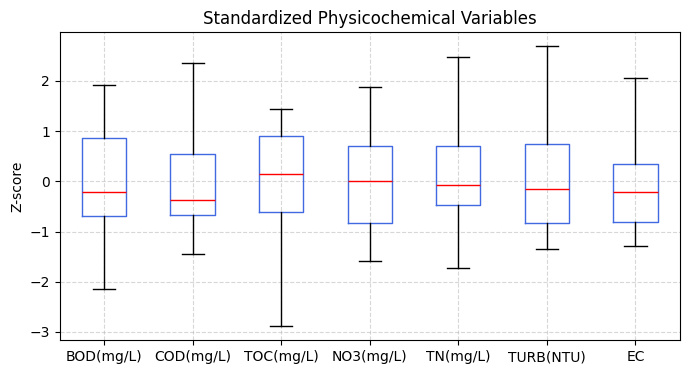

In [ ]:
phys_z.plot(kind='box', figsize=(8,4), color=dict(boxes='royalblue', whiskers='black', medians='red', caps='black'))
plt.title("Standardized Physicochemical Variables", fontsize=12)
plt.ylabel("Z-score")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

<p align="justify"> The plot demonstrates that all physicochemical variables were correctly standardized, as their respective box plots are centered near 0 and exhibit a similar dispersion. This confirms the efficacy of the Z-score normalization process, ensuring that no variable dominates the others and that all variables are situated on a comparable scale.

**Preprocessed dataset**

<p align="justify"> In this final step, the pd.concat() function was utilized to merge the standardized physicochemical data (phys_z) with the spectral principal components (PCA_1 through PCA_5) from the spectra_final DataFrame.The reset_index(drop=True) function was employed to correctly align the rows prior to combination, and the parameter axis=1 specified that the merge should be performed column-wise. Collectively, this process integrates all processed information (physicochemical and spectral) into a single final DataFrame, designated final_df, thereby preparing the data for subsequent feature extraction.

In [ ]:
final_physicochemicalAndspecdata = pd.concat([phys_z.reset_index(drop=True),
                      spectra_final[[c for c in spectra_final.columns if "PCA" in c]].reset_index(drop=True)],axis=1)

print("Shape of final_df:", final_physicochemicalAndspecdata.shape)
final_physicochemicalAndspecdata.head()


Shape of final_df: (29, 12)


,BOD(mg/L),COD(mg/L),TOC(mg/L),NO3(mg/L),TN(mg/L),TURB(NTU),EC,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,-0.206867,-0.712857,0.935149,-1.066426,-0.114061,-0.584700,-0.792165,-1.348793,11.037226,2.965924,1.412316,-0.402386
1,1.534818,0.243538,1.090881,-1.506622,-0.236807,1.194664,-0.910117,-14.399892,0.316740,-1.154608,1.602039,-0.742600
2,-0.787428,-1.374978,-0.807106,-1.574864,-1.663777,0.297506,-1.021130,-14.482431,4.435474,0.807501,1.724528,-1.278900
3,-2.142072,-0.308228,-2.887592,-0.837268,-1.179128,-0.988421,-0.264853,5.018504,13.442688,-0.541874,0.500286,-0.272264
4,-1.077709,-1.448546,-1.142904,-1.595459,-1.734798,-1.347284,-1.261658,-8.630497,3.736476,0.079687,-6.679877,-0.853681


# Feature extraction using OOP

<p align="justify"> The basic structure of the FeatureExtractor class is created. The init method, the constructor, automatically executes upon the instantiation of a new class object. The data parameter receives the physicochemical or spectral dataset and stores it within the object as self.data, enabling its subsequent use by the class's other methods.

<p align="justify"> The basicStats method computes three fundamental statistical features for the physicochemical variables of each sample:

mean: The average of all physicochemical variables per sample is calculated, which serves to indicate the overall concentration level of the physicochemical parameters. A high value may reflect greater contamination.

std: The standard deviation among the variables is calculated, which measures the internal variability within each sample. A high standard deviation indicates that some chemical properties have significantly different values from others, which may reflect a heterogeneous composition or an imbalance in the water parameters.

rms: The Root Mean Square (RMS) represents the total magnitude or global intensity of the chemical concentrations. A high RMS indicates samples with elevated chemical values or those dominated by a strong parameter, while a low RMS reflects samples that are more uniform and exhibit lower concentrations.

<p align="justify"> The basicStats() method computes three statistical indicators from the physicochemical data of each sample. First, a new DataFrame is created to store the results. Then, the mean() function from pandas is used to obtain the average of the variables, std() calculates the standard deviation (variability among parameters), and NumPy's function np.sqrt(np.mean(np.square(...))) is used to derive the RMS value, which combines magnitude and dispersion to reflect the global intensity of the chemical concentrations. Finally, these values are returned as a set of summarized features for each sample.

<p align="justify"> The spectralFeatures() method computes three main features that describe the spectral behavior of each sample:

spectral_energy: Obtained by summing the squares of the PCA component values, this represents the total energy or global intensity of the spectrum. A high value indicates a stronger signal or one with higher energy content.

mean_power: This corresponds to the total energy divided by the number of components. It measures the average power of the spectrum and allows for the comparison of samples with different magnitudes or number of components.

spectral_entropy: This measures how energy is distributed among the spectral components. High values indicate that the energy is more widely spread, resulting in a more complex or uniform spectrum, while low values reflect energy concentrated in a few dominant components.

<p align="justify"> First, a new DataFrame is created to store the results. Then, spectral energy is obtained using np.square() and np.sum() as the sum of the squares of all components, which reflects the total intensity of the spectrum. From this energy, the mean power is calculated by dividing the spectral energy by the number of components (self.data.shape[1]). Subsequently, the energy of each component is normalized to estimate its relative proportion (norm_energy). SciPy's entropy() function is then used to calculate the spectral entropy, which measures the complexity or dispersion of the energy among the components. Finally, the method returns a set of three features that summarize the intensity, power, and complexity of the spectral behavior of each sample.

In [ ]:
class FeatureExtractor:
    def __init__(self, data):
        self.data = data

    def basicStats(self):
      physicochemical_characteristics = pd.DataFrame(index=self.data.index if hasattr(self.data, "index") else None)
      physicochemical_characteristics["mean"] = self.data.mean(axis=1)
      physicochemical_characteristics["std"]  = self.data.std(axis=1)
      physicochemical_characteristics["rms"]  = np.sqrt(np.mean(np.square(self.data), axis=1))
      return physicochemical_characteristics

    def spectralFeatures(self):
      spectral_characteristics = pd.DataFrame(index=self.data.index if hasattr(self.data, "index") else None)
      spectral_energy = np.sum(np.square(self.data), axis=1)
      spectral_characteristics["spectral_energy"] = spectral_energy
      spectral_characteristics["mean_power"] = spectral_energy / self.data.shape[1]
      norm_energy = (np.square(self.data).T / np.square(self.data).sum(axis=1)).T
      spectral_characteristics["spectral_entropy"] = norm_energy.apply(lambda x: entropy(x + 1e-12), axis=1)
      return spectral_characteristics

<p align="justify"> The final table is separated into two subsets by domain.

<p align="justify"> First, phys_cols is constructed using all columns that do not start with "PCA_", retaining only the physicochemical variables. Then, phys_df is created by keeping only the numerical columns using select_dtypes(include="number") to exclude text columns.

<p align="justify"> Subsequently, spec_cols is defined using the columns that do start with "PCA_" (the PCA components of the spectral domain), and spec_df is created with these columns.

<p align="justify"> This division enables the FeatureExtractor class to be applied cleanly: basicStats() on phys_df and spectralFeatures() on spec_df, avoiding the mixing of domains or data types.

In [ ]:
phys_cols = [c for c in final_physicochemicalAndspecdata.columns if not str(c).startswith("PCA_")]
phys_df = final_physicochemicalAndspecdata[phys_cols].select_dtypes(include="number")

spec_cols = [c for c in final_physicochemicalAndspecdata.columns if str(c).startswith("PCA_")]
spec_df = final_physicochemicalAndspecdata[spec_cols]

<p align="justify"> Two objects of the FeatureExtractor class are instantiated for each data domain.

<p align="justify"> In the first instance, phys_extractor = FeatureExtractor(phys_df), an extractor is generated that will operate on the physicochemical variables, i.e., the phys_df DataFrame containing parameters such as BOD, COD, NO3, etc.

<p align="justify"> In the second instance, spectral_extractor = FeatureExtractor(spec_df), another extractor is created that will work with the spectral variables, which are represented by the PCA components in spec_df.

In [ ]:
phys_extractor = FeatureExtractor(phys_df)
spectral_extractor = FeatureExtractor(spec_df)

<p align="justify"> The basicStats() method is executed on the physicochemical data extractor to calculate and return the three summarized features per sample (mean, standard deviation, and RMS) in a new DataFrame called phys_features.

<p align="justify"> Subsequently, print("Shape:", phys_features.shape) is used to verify the size of the resulting DataFrame. Finally, phys_features.head() is executed to visualize the first rows and confirm that the values were generated correctly and possess the expected format.

In [ ]:
phys_features = phys_extractor.basicStats()
print("Shape:", phys_features.shape)
phys_features.head()

Shape: (29, 3)


,mean,std,rms
0,-0.363133,0.661070,0.711652
1,0.201480,1.147632,1.081436
2,-0.990254,0.668004,1.167512
3,-1.229652,0.964006,1.519405
4,-1.372623,0.237799,1.390167


<p align="justify"> The basicStats() method generated three physicochemical features per sample (mean, standard deviation, and RMS), yielding a total of 29 rows and 3 columns.

<p align="justify"> The results show variations among samples, where the average (mean) reflects the general concentration level, the standard deviation (std) indicates the dispersion among the parameters, and the RMS summarizes the global magnitude of the chemical concentrations.



<p align="justify"> This block executes the spectralFeatures() method on the spectral data extractor to compute three principal features: spectral_energy, mean_power, and spectral_entropy.

<p align="justify"> The results are stored in the spectral_features DataFrame, which contains one row per sample and three columns with the calculated values. The line print("Shape:", spectral_features.shape) displays the size of the result, and spectral_features.head() allows for the visualization of the first rows to confirm that the features were correctly generated.

In [ ]:
spectral_features = spectral_extractor.spectralFeatures()
print("Shape:", spectral_features.shape)
spectral_features.head()

Shape: (29, 3)


,spectral_energy,mean_power,spectral_entropy
0,134.592860,26.918572,0.397212
1,211.908319,42.381664,0.125700
2,234.675870,46.935174,0.414537
3,206.509283,41.301857,0.393714
4,133.802603,26.760521,0.956987


<p align="justify"> The spectralFeatures() method generated three spectral features per sample (spectral_energy, mean_power, and spectral_entropy), resulting in a total of 29 rows and 3 columns.

<p align="justify"> The results show notable differences among samples:
Spectral energy and mean power reflect the overall intensity of the spectrum. Spectral entropy measures the complexity or dispersion of that energy.High values for energy and power indicate samples with stronger spectral signals, while a higher entropy suggests a more complex and distributed spectrum.

In [ ]:
all_features = pd.concat([phys_features.reset_index(drop=True),spectral_features.reset_index(drop=True)], axis=1)
print("Shape all_features:", all_features.shape)
all_features.head()

Shape all_features: (29, 6)


,mean,std,rms,spectral_energy,mean_power,spectral_entropy
0,-0.363133,0.661070,0.711652,134.592860,26.918572,0.397212
1,0.201480,1.147632,1.081436,211.908319,42.381664,0.125700
2,-0.990254,0.668004,1.167512,234.675870,46.935174,0.414537
3,-1.229652,0.964006,1.519405,206.509283,41.301857,0.393714
4,-1.372623,0.237799,1.390167,133.802603,26.760521,0.956987


<p align="justify"> This block combines all the features obtained from the two domains into a single dataset.

<p align="justify"> First, the phys_features (physicochemical) and spectral_features (spectral) DataFrames are joined horizontally using pd.concat([...], axis=1), ensuring both parts maintain the same sample order thanks to reset_index(drop=True).The result, saved in all_features, contains six columns (three from each domain) and 29 rows, one per sample.The instruction print("Shape all_features:", all_features.shape) displays its total size, and all_features.head() allows for the visualization of the first rows to verify the successful merging. In essence, this block creates the complete feature space, combining the physicochemical and spectral information into a single matrix ready for statistical and separability analysis.

# Statistical analysis of custom data and feature extraction

<p align="justify"> This block defines which columns will form the feature space and organizes them into a single DataFrame.
<p align="justify">First, the three physicochemical variables are listed (phys_cols = ["mean", "std", "rms"]) and the three spectral variables (spec_cols = ["spectral_energy", "mean_power", "spectral_entropy"]). Subsequently, the six columns are selected in that specific order, and a copy named X is created using X = all_features[phys_cols + spec_cols].copy().This step prepares a compact and clean dataset containing all the relevant features (three per domain) for the analyses in the following sections.

In [57]:
phys_cols = ["mean","std","rms"]
spec_cols = ["spectral_energy","mean_power","spectral_entropy"]

X = all_features[phys_cols + spec_cols].copy()

**Correlation (physics vs spec blocks)**

<p align="justify"> This operation is used to identify the connection between the two domains physicochemical and spectral, whether the physicochemical properties have a direct or inverse relationship with the spectral characteristics. This process allows for the detection of patterns and the recognition of highly similar variables, which might contribute redundant information.

<p align="justify"> This block calculates and visualizes the correlation matrix of the six features in dataset X to analyze how the physicochemical and spectral variables are related to each other. First, the X.corr() function obtains the correlation values between every pair of variables (ranging from −1 to 1). Then, sns.heatmap() generates a heatmap where the colors show whether the relationships are positive (red), negative (blue), or nonexistent (close to zero).The parameters annot=True and fmt=".2f" allow for the visualization of the exact values inside each cell, while square=True and cbar_kws improve the figure's design.



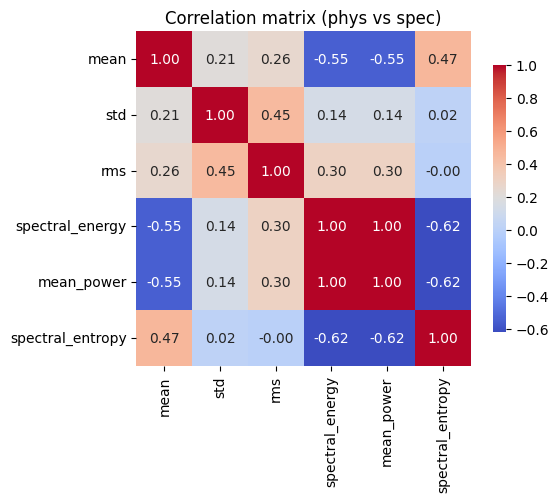

In [69]:
corr = X.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink":0.8})
plt.title("Correlation matrix (phys vs spec)")
plt.tight_layout()
plt.show()

<p align="justify"> The correlation matrix displays the relationships among the six derived features.
<p align="justify"> A strong positive correlation (r = 1.00) is observed between the spectral variables spectral_energy and mean_power, which was expected since both measure the intensity of the spectrum.In contrast, physicochemical variables like mean show moderate negative correlations with spectral energy and power (r \approx -0.55). This suggests that as the average chemical concentrations increase, the spectral response tends to decrease in intensity; this is highly sensible as the water becomes denser or cloudier with more contamination.spectral_entropy exhibits a negative correlation with energy (r = -0.62) and a positive correlation with the physicochemical mean (r = 0.47). This indicates that samples with greater spectral complexity are often associated with higher physicochemical values, which could explain the peaks shown in the graphs.

**Distributions by domain**
<p align="justify">This operation is performed to compare the physicochemical and spectral features on the same scale. This process transforms all variables to have a mean of 0 and a standard deviation of 1, which enables the comparison of the domains. Specifically, it helps visualize whether the physicochemical and spectral values behave similarly or if one of the two domains exhibits wider or more dispersed distributions.

<p align="justify"> This code block standardizes the six features in the X dataset to compare them on the same scale and analyze their differences across domains.

<p align="justify"> First, Z = (X - X.mean()) / X.std(ddof=0) transforms all variables into z-scores, resulting in a mean of 0 and a standard deviation of 1, effectively eliminating the influence of varying units or magnitudes. Next, melt() reorganizes the DataFrame into a long format, which allows all features to be worked with in a single column. A new column named domain is subsequently created, classifying each feature as physicochemical or spectral, based on its type. Following the transformation, violin and box plots are generated to display the shape and dispersion of the distributions in both domains, facilitating a direct visual comparison. Finally, a numerical summary (mean, std, median, min, max) is calculated for each domain, enabling a quantitative assessment of the differences in the variability and general behavior of the standardized values.

/tmp/ipython-input-2194181908.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_long, x="domain", y="z", inner=None, palette={"Physico-chemical": "blue", "Spectral": "red"})
/tmp/ipython-input-2194181908.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_long, x="domain", y="z", width=0.25, showcaps=True, boxprops={"zorder":2},palette={"Physico-chemical": "orange", "Spectral": "orange"})


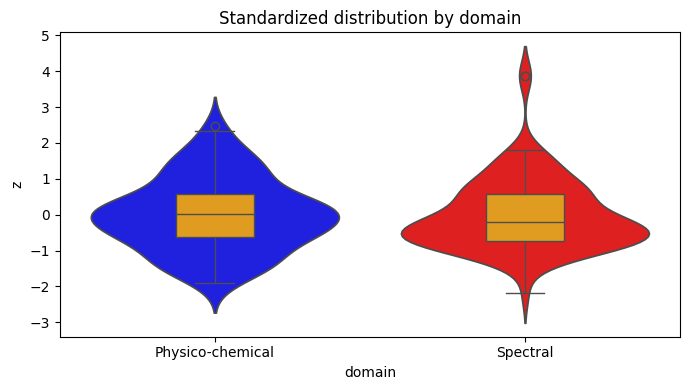

Summary (z-score) by domain:
                   mean    std  median    min    max
domain                                             
Physico-chemical   0.0  1.006   0.011 -1.907  2.460
Spectral          -0.0  1.006  -0.210 -2.193  3.876


In [76]:
Z = (X - X.mean()) / X.std(ddof=0)

df_long = Z.melt(var_name="feature", value_name="z")
df_long["domain"] = np.where(df_long["feature"].isin(phys_cols), "Physico-chemical", "Spectral")

plt.figure(figsize=(7,4))
sns.violinplot(data=df_long, x="domain", y="z", inner=None, palette={"Physico-chemical": "blue", "Spectral": "red"})
sns.boxplot(data=df_long, x="domain", y="z", width=0.25, showcaps=True, boxprops={"zorder":2},palette={"Physico-chemical": "orange", "Spectral": "orange"})
plt.title("Standardized distribution by domain")
plt.tight_layout()
plt.show()

domain_summary = df_long.groupby("domain")["z"].agg(["mean","std","median","min","max"]).round(3)
print("Summary (z-score) by domain:\n", domain_summary)

<p align="justify">The violin plot compares the standardized (z-score) distributions of the physicochemical and spectral features.In both cases, the means are located close to zero due to the standardization, which allows for a fair comparison between domains. However, the spectral domain exhibits greater dispersion and variability, with values reaching wider extremes (minimum \approx -2.19 and maximum \approx 3.88) compared to the physicochemical domain (minimum \approx -1.91 and maximum \approx 2.46).
This suggests that the spectral measurements are much more sensitive and information-rich, meaning they are capable of capturing more marked and subtle differences between samples.

<p align="justify">In contrast, the physicochemical domain has a more compact and centered distribution, suggesting that the chemical properties tend to remain within more stable ranges across samples.
<p align="justify">Collectively, the results indicate that the spectral domain captures greater variability and potentially more sensitivity to changes in sample conditions. This aligns with the practical context where field spectrophotometers can introduce instability due to light, leading to potential false positives, yet they are highly effective for small concentrations in water. Meanwhile, physicochemical measurements are generally more stable when measured in situ.

**correlation between domains**

<p align="justify"> An average index per domain was calculated to obtain a general overview of each sample's behavior within each feature set. Instead of analyzing each variable separately, the information is summarized into two representative values:

<p align="justify">PhysIndex: Summarizes the mean behavior of the physicochemical features.
<p align="justify">SpecIndex: Summarizes the mean behavior of the spectral features.

<p align="justify">This allows for the comparison of both domains to determine if they are related.
If the correlation between them is high and positive, it means that samples with high physicochemical values also exhibit high spectral responses.If the correlation is negative or low, it indicates that both domains behave independently or complementarily, confirming that they provide distinct information about the samples.


<p align="justify"> The operations Z[phys_cols].mean(axis=1) and Z[spec_cols].mean(axis=1) calculate the average of the standardized variables for each domain per sample, generating two new indicators: PhysIndex (physicochemical) and SpecIndex (spectral). Subsequently, both indices are combined into a DataFrame, and their Pearson correlation is calculated to measure the degree of their relationship Finally, a scatter plot is created using sns.regplot, where each point represents a sample and the blue line illustrates the linear trend between the two indices.


PhysIndex vs SpecIndex Correlation: 0.070


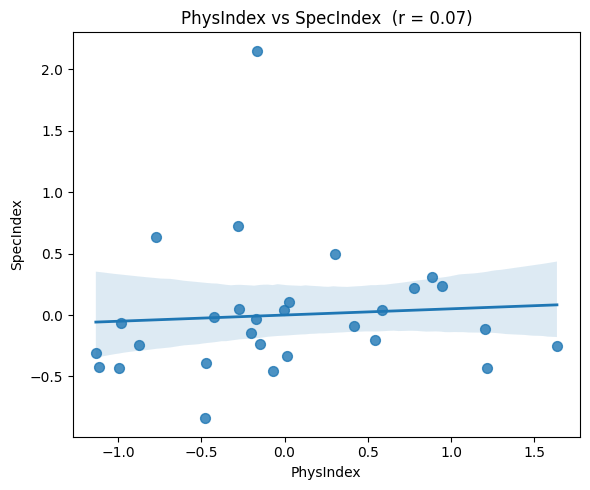

In [72]:
phys_index = Z[phys_cols].mean(axis=1)
spec_index = Z[spec_cols].mean(axis=1)
idx_df = pd.DataFrame({"PhysIndex": phys_index, "SpecIndex": spec_index})

corr_idx = idx_df.corr().loc["PhysIndex","SpecIndex"]
print(f"\nPhysIndex vs SpecIndex Correlation: {corr_idx:.3f}")

plt.figure(figsize=(6,5))
sns.regplot(data=idx_df, x="PhysIndex", y="SpecIndex", scatter_kws={"s":50, "alpha":0.8}, line_kws={"linewidth":2})
plt.title(f"PhysIndex vs SpecIndex  (r = {corr_idx:.2f})")
plt.tight_layout()
plt.show()

<p align="justify"> The graph illustrates the relationship between the Physicochemical Index (PhysIndex) and the Spectral Index (SpecIndex), both calculated as the standardized average of their respective features.
The obtained Pearson correlation coefficient (r = 0.07) indicates a virtually null relationship between the two domains. In the scatter plot, the points are distributed randomly around the trend line, without a clear upward or downward inclination.This signifies that the physicochemical and spectral values do not vary together: samples with higher chemical concentrations do not necessarily exhibit more intense spectra, and vice versa. In other words, both domains contribute distinct and complementary information about the samples. While physicochemical variables reflect the direct chemical conditions of the water, spectral variables capture aspects more related to the structure or optical response.
<p align="justify"> The low correlation (r= 0) confirms that the physicochemical and spectral domains describe different properties of the system. This is a positive finding as it demonstrates that each group of features adds unique information to the overall analysis.

**Selecting the number of groups (k) based on a metric**


<p align="justify">  Six features have been obtained that describe each sample. However, it is yet unknown whether natural groups or patterns exist within the data to differentiate them, as the dataset lacks true labels.

<p align="justify">  Therefore, an unsupervised clustering method called K-Means is applied to discover possible internal categories based on feature similarity. The objective is to identify if the samples can be divided into groups with similar behavior based on their physicochemical and spectral properties.
For this purpose, the following metrics are used to evaluate the resulting clusters:
Silhouette Score (sil): Measures how well separated the clusters are from each other and how internally compact they are. Closer to 1 indicates better separation.
Calinski–Harabasz Index (CH): Measures the ratio between the between-cluster dispersion and the within-cluster dispersion. Higher values indicate a better-defined clustering.
Davies–Bouldin Index (DB): Measures the average similarity between each cluster and its nearest neighbor. Lower values indicate better separation.

<p align="justify"> This code block applies the K-Means algorithm to identify potential groups within the standardized data (Z), testing different numbers of clusters (k, from 2 to 5) to determine which offers the best separation among samples. In each iteration, km.fit_predict(Z) executes the model and assigns a cluster label to each sample. Subsequently, three evaluation metrics are calculated (Silhouette Score, Calinski–Harabasz Index, and Davies–Bouldin Index).The results are stored in a table (scores_df). Finally, the k value that exhibits the highest Silhouette score is selected, as this metric indicates the best clustering structure (well-separated and compact groups).

<p align="justify"> The code determines the optimal number of groups ({best k}) and stores the assigned labels in the labels variable, which will subsequently be used to analyze and visualize the differences between the detected clusters.

In [78]:
scores = []
labels_by_k = {}

for k in range(2, 6):
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    lab = km.fit_predict(Z)
    labels_by_k[k] = lab
    sil = silhouette_score(Z, lab)
    ch  = calinski_harabasz_score(Z, lab)
    db  = davies_bouldin_score(Z, lab)
    scores.append({"k": k, "silhouette": sil, "calinski_harabasz": ch, "davies_bouldin": db})

scores_df = pd.DataFrame(scores).round(3)
print("Metrics by k sil, CH, DB:\n", scores_df)

best_k = int(scores_df.sort_values("silhouette", ascending=False).iloc[0]["k"])
labels = labels_by_k[best_k]
print(f"\nBetter than K by Silhouette: {best_k}")

Metrics by k silhouette, CH, DB:
    k  silhouette  calinski_harabasz  davies_bouldin
0  2       0.371             15.298           1.080
1  3       0.308             16.088           1.035
2  4       0.293             16.015           1.042
3  5       0.306             15.461           0.944

Better than K by Silhouette: 2


<p align="justify"> The Silhouette Score is 0.371 for k=2, which signifies that two groups best represent the underlying data structure.
<p align="justify">  Calinski–Harabasz Index: The values are similar across all k and do not clearly increase, reinforcing the idea that adding more groups is unnecessary.Davies–Bouldin (DB) Index: While k=5 has the lowest DB score (0.944), its Silhouette score is lower and the CH index does not improve, suggesting more subdivisions but without real separation. The best number of groups, according to the Silhouette Index, is k=2, with a value of 0.371. This indicates a moderate but real separation between the samples.This finding means that two main behavioral patterns can be distinguished within the dataset.

**ANOVA and Fisher Ratio**
<p align="justify">Once the K-Means clustering method has identified two groups within the data, it is necessary to verify if these differences are statistically significant and to determine which features best explain the separation between the groups.
For this purpose, two methods are used:

Analysis of Variance (ANOVA): This compares the means of each feature between the groups to determine if statistically significant differences exist.

Fisher's Ratio (F-ratio): This measures how well separated the groups are, essentially quantifying the ratio of the variance between the groups to the variance within the groups.

<p align="justify"> This block applies ANOVA and Fisher's Ratio tests to each of the six features in the X dataset to evaluate which variables significantly differentiate the groups obtained with K-Means.
<p align="justify"> First, the function fisher_ratio() is defined, which calculates the ratio between the variance of the group means and the variance within each group. This indicates the discriminant power of each variable.Next, within the for loop, all columns of \mathbf{X} are iterated over:ANOVA is executed using stats.f_oneway(), obtaining the F statistic and its p-value. These results determine if significant differences exist between the groups for that variable.Simultaneously, the Fisher's Ratio is calculated to measure the separability between the classes.The results are stored in two tables (\mathbf{anova\_df} and \mathbf{fisher\_df}), which are ordered by p-value and Fisher's Ratio, respectively. This allows for the clear identification of which features are most relevant for distinguishing the two detected groups.

In [79]:
def fisher_ratio(values, groups):
    classes = np.unique(groups)
    means = [np.mean(values[groups == c]) for c in classes]
    vars_ = [np.var(values[groups == c], ddof=1) for c in classes]
    if np.mean(vars_) == 0:
        return np.nan
    return np.var(means, ddof=1) / np.mean(vars_)

anova_rows, fisher_rows = [], []
for col in X.columns:
    grp = [X.loc[np.array(labels) == c, col].values for c in np.unique(labels)]
    F, p = stats.f_oneway(*grp)
    anova_rows.append({"feature": col, "F": F, "p_value": p})
    fisher_rows.append({"feature": col, "FisherRatio": fisher_ratio(X[col].values, labels)})

anova_df = pd.DataFrame(anova_rows).sort_values("p_value").reset_index(drop=True)
fisher_df = pd.DataFrame(fisher_rows).sort_values("FisherRatio", ascending=False).reset_index(drop=True)

print("\nANOVA for feature:")
print(anova_df.round(4))
print("\nFisher ratio for feature:")
print(fisher_df.round(4))


ANOVA for feature:
            feature        F  p_value
0   spectral_energy  52.9264   0.0000
1        mean_power  52.9264   0.0000
2              mean  15.7745   0.0005
3  spectral_entropy  15.1991   0.0006
4               rms   3.3828   0.0769
5               std   0.1458   0.7055

Fisher ratio for feature:
            feature  FisherRatio
0   spectral_energy       2.5100
1        mean_power       2.5100
2              mean       1.5817
3  spectral_entropy       1.3680
4               rms       0.3779
5               std       0.0137


<p align="justify">The variables spectral_energy and mean_power exhibit very high F-values (p approx 52.9) and p-values of 0 (where p < 0.001), indicating a statistically significant difference between the two groups. Similarly, the mean variable shows a clear difference (F = 15.77, p = 0.0005), as does spectral_entropy (F = 15.19, p = 0.0006).In contrast, rms shows a slight difference (p approx 0.07), and std presents no significant differences (p approx 0.70). This demonstrates that the spectral variables (spectral_energy, mean_power, spectral_entropy) and the physicochemical mean are the ones that truly separate the groups.

<p align="justify">In the Fisher's Ratio, the highest values correspond to spectral_energy (approx 2.51), mean_power (approx 2.51), mean (approx 1.58), and spectral_entropy (approx 1.36). This finding is consistent with the ANOVA results and confirms that the spectral variables have the highest discriminant power, followed by the physicochemical mean.

<p align="justify"> In summary, both tests concur that the separation between the groups is primarily due to the behavior of the spectral features, complemented by differences in the average physicochemical values. This confirms the existence of two well-differentiated classes within the dataset:

<p align="justify"> Class 1: Samples with higher physicochemical concentrations (high mean) and lower spectral energy, which could represent conditions with a high chemical load and low optical response.

<p align="justify"> Class 2: Samples with high spectral energy and power but low average physicochemical values, indicating a more intense spectral response and a chemically lighter environment.

<p align="justify"> These findings align with the observations from the correlation heatmap.

# Data separability

<p align="justify"> For the model, the classes will be:

<p align="justify"> Class 0: "High physicochemical and Low spectral," comprising samples with high physicochemical values and low spectral energy.

<p align="justify"> Class 1: "High spectral and Low physicochemical," comprising samples with high spectral energy/power and low physicochemical values.

<p align="justify"> These two classes were defined based on the groups discovered by K-Means clustering and were subsequently confirmed using ANOVA and the Fisher Ratio, which demonstrated that the spectral variables and the physicochemical mean are what significantly differentiate both behaviors.

<p align="justify"> In this block, the previously obtained group labels are converted into a numerical array so they can be used as classes in the classification and evaluation models.


In [85]:
y = np.array(labels)

<p align="justify"> This evaluate_model() function assesses the performance of a classification model using stratified cross-validation.First, StratifiedKFold is used to divide the data (X, y) into 5 subsets while maintaining class balance. Using cross_val_predict, the model (clf) is trained and predicts on each partition, obtaining the final predictions (y_pred) and, when possible, the probabilities (fy_proba) for calculating the ROC-AUC.Next, the most relevant performance metrics are calculated:Accuracy (proportion of correct predictions).Precision (percentage of correct predictions for the positive class).Recall (percentage of true positives detected).F1-score (the balance between precision and recall).ROC-AUC (the model's overall ability to separate the classes).These metrics allow for the comparison of different classifiers and determine how well the two classes identified in the previous analysis are distinguished.

In [86]:
def evaluate_model(clf, X, y, cv_splits=5):
    cv = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    y_pred = cross_val_predict(clf, X, y, cv=cv)
    try:
        y_proba = cross_val_predict(clf, X, y, cv=cv, method="predict_proba")[:, 1]
        auc = roc_auc_score(y, y_proba)
    except Exception:
        y_proba, auc = None, np.nan

    acc = accuracy_score(y, y_pred)
    prec = precision_score(y, y_pred, pos_label=1, zero_division=0)
    rec  = recall_score(y, y_pred,    pos_label=1, zero_division=0)
    f1   = f1_score(y, y_pred,        pos_label=1, zero_division=0)
    return acc, prec, rec, f1, auc, y_pred, y_proba

<p align="justify"> his block compares the performance of three classification models applied to the data (X, y) to evaluate how well they separate the two discovered classes.First, the models are defined within a dictionary:A Baseline (a classifier that always predicts the most frequent class, used as a minimum reference).A Logistic Regression (a linear model that assesses class separability).A k-Nearest Neighbors (k=5) (a non-linear model based on proximity).All models are constructed with a Pipeline that includes StandardScaler() to standardize the variables before training.Next, using a for loop, each model is evaluated using the evaluate_model() function, calculating metrics like Accuracy, Precision, Recall, F1-score, and ROC-AUC via 5-fold cross-validation.The results are saved in a list (rows) and then converted into a DataFrame (results_df) to visualize and compare the performance of each model, ultimately determining which one achieves the best classification capability between the two identified classes.

In [87]:
models = { "Baseline": make_pipeline(StandardScaler(), DummyClassifier(strategy="most_frequent")),
           "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(solver="liblinear", random_state=42)),
            "kNN (k=5)": make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))}

rows = []
best_name, best_auc, best_proba = None, -1, None

for name, clf in models.items():
    acc, prec, rec, f1, auc, y_pred, y_proba = evaluate_model(clf, X, y, cv_splits=5)
    rows.append({"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "ROC-AUC": auc})
    if not np.isnan(auc) and auc > best_auc:
        best_auc = auc
        best_name = name
        best_proba = y_proba

results_df = pd.DataFrame(rows).round(3)
print("Metrics:\n", results_df)

Metrics:
                  Model  Accuracy  Precision  Recall     F1  ROC-AUC
0             Baseline     0.759        0.0   0.000  0.000    0.500
1  Logistic Regression     0.966        1.0   0.857  0.923    1.000
2            kNN (k=5)     0.931        1.0   0.714  0.833    0.981


<p align="justify"> This table displays the metrics for three classifiers applied to the two discovered classes ("High physicochemical and Low spectral" and "High spectral and Low physicochemical").The Baseline model achieved an Accuracy of 0.759, but with Precision, Recall, and F1-score all at 0.0, and an ROC-AUC of 0.5. This indicates that it has no ability to distinguish between classes (it always predicts the same label).

<p align="justify"> This result serves as the minimum reference for comparing the other models.Logistic Regression achieved the best overall performance with an Accuracy of 0.966, Precision = 1.0, Recall = 0.857, F1-score = 0.923, and an ROC-AUC = 1.0. This demonstrates that the linear model can separate the two classes almost perfectly, which confirms that the physicochemical and spectral features contain sufficient information to differentiate the groups detected by K-Means.The kNN (k=5) also yielded excellent results (Accuracy = 0.931, F1-score = 0.833, ROC-AUC = 0.981), showing that the separability pattern is robust even with a non-linear, similarity-based model.The high performance of both Logistic Regression and kNN demonstrates that the selected variables (three physicochemical and three spectral) describe two distinct and consistent behaviors in the samples. Specifically, samples with higher spectral energy and power are clearly grouped separate from those with higher physicochemical concentrations.

<p align="justify"> The separability between both classes is stable and reliable, which supports the results of the ANOVA, the Fisher Ratio, and the correlation analysis performed previously.The Logistic Regression, with an ROC-AUC of 1.0, shows that the feature space created from the physicochemical and spectral data effectively and precisely describes the differences between both domains, thereby validating the entire process of feature extraction, analysis, and class separation.


**REFERENCES**

Yan, C. (2025). A review on spectral data preprocessing techniques for machine learning and quantitative analysis. iScience, 28(7), 112759. https://doi.org/10.1016/j.isci.2025.112759

Rinnan, Å., Van Den Berg, F., & Engelsen, S. B. (2009). Review of the most common pre-processing techniques for near-infrared spectra. TrAC Trends in Analytical Chemistry, 28(10), 1201–1222. https://doi.org/10.1016/j.trac.2009.07.007